Loading the data


In [1]:
import pandas as pd
# Load data
google = pd.read_csv('/content/googleads-performance.csv')
microsoft = pd.read_csv('/content/microsoftads-performance.csv')
meta = pd.read_csv('/content/metaads-performance.csv')
website = pd.read_csv('/content/website-landings.csv')

Adding Source_Category to Google, Microsoft and Meta

In [2]:
google['Source_Category']='Google'
microsoft['Source_Category']='Microsoft'
meta['Source_Category']='Meta'

Assuming Campaign Type of Meta as "General"

In [3]:
meta['Campaign type']='General'

Concatenating DataFrames for Google, Microsoft and Meta to bring all related data together into a single structure, making it easier to analyze as a whole.

In [4]:
ads_data = pd.concat([google, microsoft, meta], ignore_index=True)

In [5]:
ads_data.drop(columns=['Reach'], inplace=True)

Summary of the Dataframes

In [6]:
ads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1617 entries, 0 to 1616
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             1617 non-null   object 
 1   Campaign type    1617 non-null   object 
 2   Impressions      1617 non-null   float64
 3   Clicks           1617 non-null   float64
 4   Cost             1617 non-null   float64
 5   Conversions      1617 non-null   float64
 6   Revenue          1617 non-null   float64
 7   Source_Category  1617 non-null   object 
dtypes: float64(5), object(3)
memory usage: 101.2+ KB


In [7]:
website.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586314 entries, 0 to 1586313
Data columns (total 6 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   User Id               1586314 non-null  object
 1   Website Landing Time  1586314 non-null  object
 2   Is Converted          1586314 non-null  int64 
 3   Source                971465 non-null   object
 4   Channel               1586314 non-null  object
 5   Campaign Type         640729 non-null   object
dtypes: int64(1), object(5)
memory usage: 72.6+ MB


Distribution of Impressions, Clicks, Cost, Conversions, and Revenue

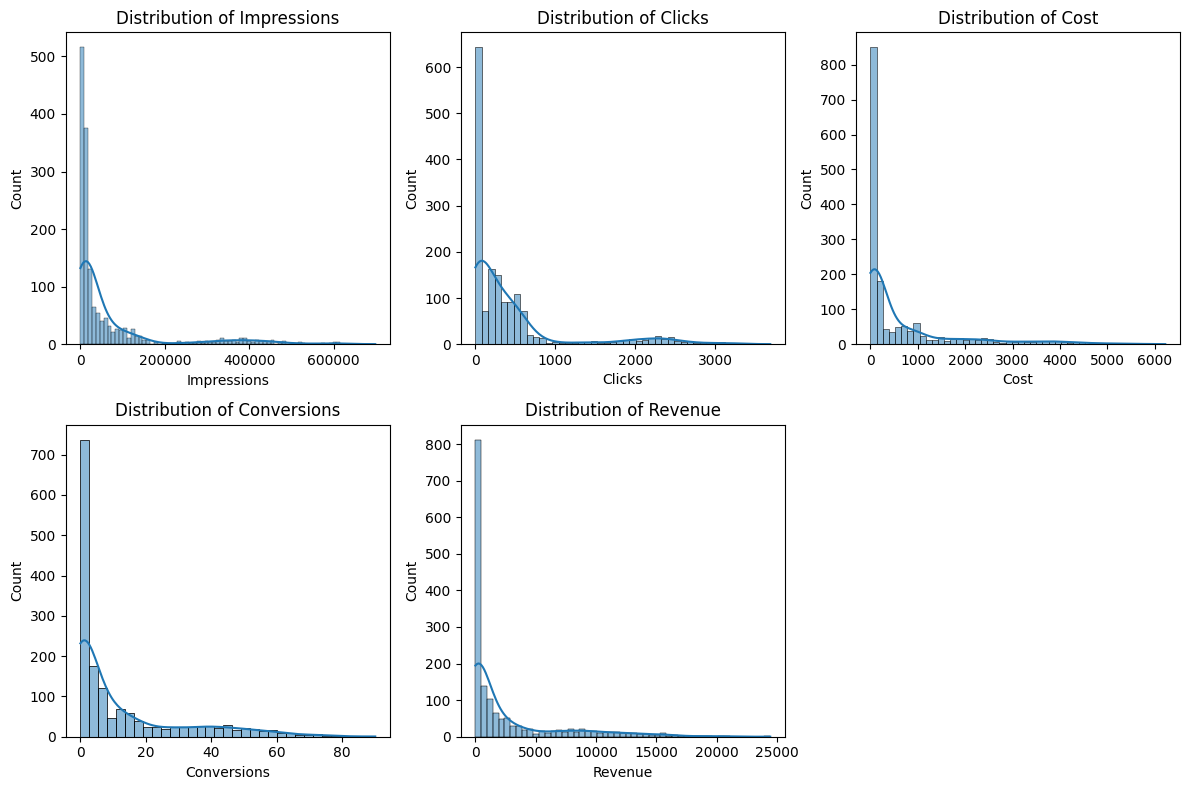

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
features = ['Impressions', 'Clicks', 'Cost', 'Conversions', 'Revenue']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(ads_data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

Bar Plot for Source_Category

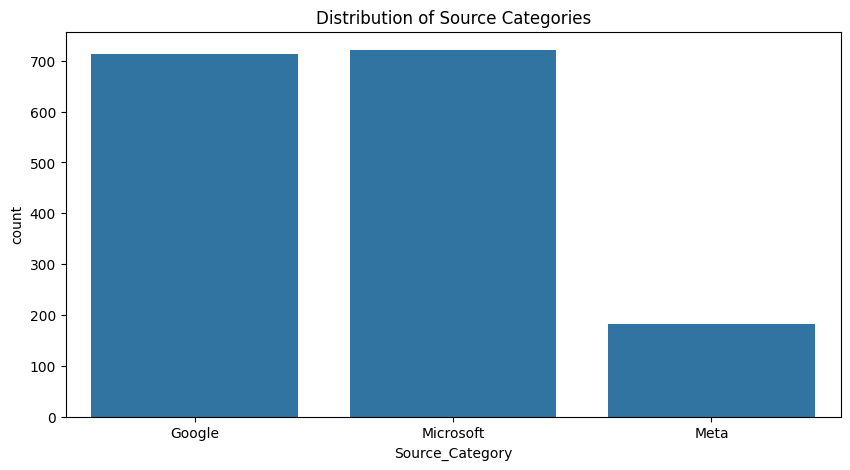

In [9]:
plt.figure(figsize=(10, 5))
sns.countplot(data=ads_data, x='Source_Category')
plt.title('Distribution of Source Categories')
plt.show()

Correlation Heatmap

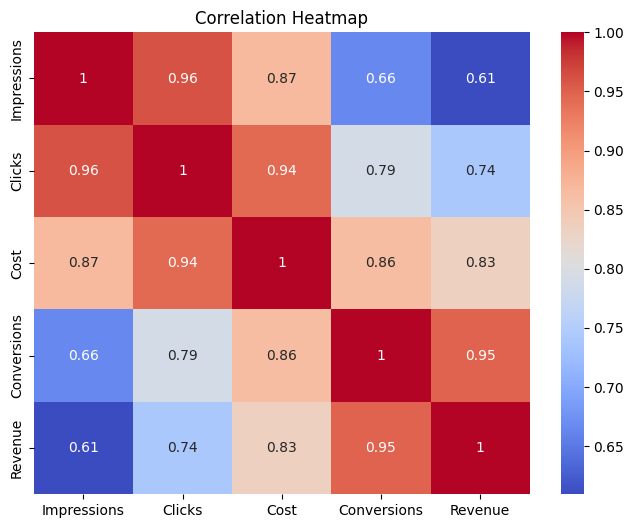

In [10]:
plt.figure(figsize=(8, 6))
corr_matrix = ads_data[['Impressions', 'Clicks', 'Cost', 'Conversions', 'Revenue']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Printing Unique Values of Source

In [11]:
print(website['Source'].unique())

[nan 'google' 'yahoo!' 'pinterest' 'facebook' 'duckduckgo' 'youtube'
 'bing' 'criteo' 'taboola' 'reddit' 'ecosia' 'tiktok' 'instagram'
 'outbrain' 'outlook.com' 'yahoo! mail' 'gmail' 'baidu' 'aol' 'hi5'
 'infospace' 'twitter' 'aol mail' 'snapchat' 'qq mail' 'yahoo! images'
 'seznam mail' 'earthlink' 'qwant' 't-online' 'optus zoo' 'google images'
 'startsiden' 'bigpond' 'naver' 'linkedin' 'quora' 'atlas' 'yandex'
 'myheritage' 'tumblr' 'mail.ru' 'skype' 'daum' 'odnoklassniki'
 'google news' 'zoho' 'lilo' 'amazon' 'seznam' 'kvasir' 'hacker news'
 'coccoc' 'startpagina']


In [12]:
source_mapping = {
    'google': 'Google',
    'youtube': 'Google',
    'google images': 'Google',
    'facebook': 'Meta',
    'instagram': 'Meta',
    'whatsapp': 'Meta',
    'bing': 'Microsoft',
    'outlook.com': 'Microsoft',
    'hotmail': 'Microsoft',
    'gmail': 'Google',
    'google news': 'Google',
}
# Apply mapping to website_df
website['Source_Category'] = website['Source'].apply(lambda x: source_mapping.get(x, None))

# Filter out rows where Source_Category is NaN
website_df = website[website['Source_Category'].notna()]

In [13]:
website_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 909150 entries, 7 to 1586313
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   User Id               909150 non-null  object
 1   Website Landing Time  909150 non-null  object
 2   Is Converted          909150 non-null  int64 
 3   Source                909150 non-null  object
 4   Channel               909150 non-null  object
 5   Campaign Type         640729 non-null  object
 6   Source_Category       909150 non-null  object
dtypes: int64(1), object(6)
memory usage: 55.5+ MB


In [14]:
print(website_df['Channel'].unique())

['organic search' 'paid' 'social' 'email' 'referral' 'paid search']


Grouping Website Dataframe by Campaign Type, Channel and Source_Category

In [15]:
grouped_website_df = website_df.groupby(['Campaign Type', 'Channel', 'Source_Category']).agg({
    'Is Converted': ['sum', 'mean'], # Total conversions and conversion rate
    'User Id': 'count'  # Number of users (or entries) per group
}).reset_index()

In [16]:
grouped_website_df.columns = ['_'.join(col).strip() for col in grouped_website_df.columns.values]
grouped_website_df.rename(columns={
    'Is Converted_sum': 'Total_Conversions',
    'Is Converted_mean': 'Conversion_Rate',
    'User Id_count': 'User_Count'
}, inplace=True)

# Display the grouped DataFrame
print(grouped_website_df)

     Campaign Type_ Channel_ Source_Category_  Total_Conversions  \
0          Audience     paid        Microsoft                140   
1     Cross-network     paid           Google               5925   
2   Display Network     paid           Google                  0   
3   Performance max     paid        Microsoft                 89   
4  Search & content     paid        Microsoft               1016   
5    Search Network     paid           Google               1476   
6          Shopping     paid        Microsoft                643   
7           YouTube     paid           Google                 13   

   Conversion_Rate  User_Count  
0         0.012791       10945  
1         0.015371      385470  
2         0.000000          25  
3         0.012769        6970  
4         0.011346       89544  
5         0.016270       90721  
6         0.011471       56052  
7         0.012974        1002  


Conversion of 'Website Landing Time' to DateTime Format

In [17]:
website_df['Website Landing Time'] = pd.to_datetime(website_df['Website Landing Time'], errors='coerce')

# Check if conversion worked
print(website_df['Website Landing Time'].dtype)  # Should be datetime64[ns]

datetime64[ns]


<ipython-input-17-16ec6f8e6a4f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  website_df['Website Landing Time'] = pd.to_datetime(website_df['Website Landing Time'], errors='coerce')


Feature Extraction from Website Data

In [18]:
def extract_features(df):
    df['Conversion_Rate'] = df.groupby(['Source_Category', 'Campaign Type'])['Is Converted'].transform('mean')

    def avg_time_lag(series):
        if len(series) > 1:
            time_diff = (series.max() - series.min()).total_seconds()
            return time_diff / (len(series) - 1)  # Avoid division by zero
        else:
            return 0

    df['Avg_Time_Lag'] = df.groupby(['Source_Category', 'Campaign Type'])['Website Landing Time'].transform(lambda x: avg_time_lag(x))

    return df[['Source_Category', 'Campaign Type', 'Conversion_Rate', 'Avg_Time_Lag', 'Channel']].drop_duplicates()

# Extract features
website_features = extract_features(website_df)

<ipython-input-18-7d480ecf9518>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Conversion_Rate'] = df.groupby(['Source_Category', 'Campaign Type'])['Is Converted'].transform('mean')
<ipython-input-18-7d480ecf9518>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Avg_Time_Lag'] = df.groupby(['Source_Category', 'Campaign Type'])['Website Landing Time'].transform(lambda x: avg_time_lag(x))


Mapping Features to Ads Data

In [19]:
# Create mapping dictionaries
conversion_rate_map = website_features.set_index(['Source_Category', 'Campaign Type'])['Conversion_Rate'].to_dict()
avg_time_lag_map = website_features.set_index(['Source_Category', 'Campaign Type'])['Avg_Time_Lag'].to_dict()
channel_map = website_features.set_index(['Source_Category', 'Campaign Type'])['Channel'].to_dict()

# Map features to ad_data
ads_data['Conversion_Rate'] = ads_data.apply(lambda row: conversion_rate_map.get((row['Source_Category'], row['Campaign type']), 0), axis=1)
ads_data['Avg_Time_Lag'] = ads_data.apply(lambda row: avg_time_lag_map.get((row['Source_Category'], row['Campaign type']), 0), axis=1)
ads_data['Channel'] = ads_data.apply(lambda row: channel_map.get((row['Source_Category'], row['Campaign type']), 0), axis=1)

# Check the updated ad_data
print(ads_data.head())


         Date    Campaign type  Impressions  Clicks    Cost  Conversions  \
0  2024-01-01    Cross-network     143669.0   896.0   656.3          6.5   
1  2024-01-01  Display Network          3.0     0.0     0.0          0.0   
2  2024-01-01   Search Network       3701.0   251.0   496.5          4.5   
3  2024-01-01          YouTube      36211.0     8.0   115.2          0.0   
4  2024-01-02    Cross-network     183496.0  1172.0  1525.0          8.8   

   Revenue Source_Category  Conversion_Rate   Avg_Time_Lag Channel  
0   1410.3          Google         0.015371      40.793737    paid  
1      0.0          Google         0.000000  317264.625000    paid  
2    576.4          Google         0.016270     173.328384    paid  
3      0.0          Google         0.012974   15698.000999    paid  
4   3565.7          Google         0.015371      40.793737    paid  


Converting 'Channel' Column to String Type

In [20]:
ads_data['Channel'] = ads_data['Channel'].astype(str)

Converting Categorical features to Numerical Features using Label Encoder

In [21]:
from sklearn.preprocessing import LabelEncoder
label_encoder_campaign = LabelEncoder()
label_encoder_source = LabelEncoder()
label_encoder_channel = LabelEncoder()
ads_data['Campaign type'] = label_encoder_campaign.fit_transform(ads_data['Campaign type'])
ads_data['Source_Category'] = label_encoder_source.fit_transform(ads_data['Source_Category'])
ads_data['Channel'] = label_encoder_channel.fit_transform(ads_data['Channel'])

Separating Features and Target Variable from DataFrame

In [22]:
X = ads_data.drop(['Conversions', 'Date'], axis=1)
y = ads_data['Conversions']


Scaling Numerical Features and Target Variable

In [23]:
from sklearn.preprocessing import StandardScaler
numerical_features = ['Impressions', 'Clicks', 'Cost', 'Revenue','Conversion_Rate','Avg_Time_Lag']
# Initialize the StandardScaler
X_scaler = StandardScaler()
y_scaler=StandardScaler()
# Fit and transform the data
X[numerical_features] = X_scaler.fit_transform(X[numerical_features])
y = y.values.reshape(-1, 1)  # Reshape for scaling
y_scaled = y_scaler.fit_transform(y)
y = pd.DataFrame(y_scaled, columns=['Conversions'])

Splitting the Data into Training and Testing Sets

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Training Random Forest Regressor

In [25]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

Model Evaluation

In [26]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import numpy as np
y_pred=model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("MSE = ",mse)
print("RMSE = ",np.sqrt(mse))
print("R2 Score = ",r2)
print("MAE = ",mae)

MSE =  0.05268581910080871
RMSE =  0.22953391710335252
R2 Score =  0.943482881787665
MAE =  0.12195093521085076


Inverse Transforming Encoded Categorical Features

In [27]:
ads_data['Campaign type'] = label_encoder_campaign.inverse_transform(ads_data['Campaign type'])
ads_data['Source_Category'] = label_encoder_source.inverse_transform(ads_data['Source_Category'])
ads_data['Channel']= label_encoder_channel.inverse_transform(ads_data['Channel'])

Aggregating Ads Data by Source and Campaign

In [28]:
grouped_data = ads_data.groupby(['Source_Category', 'Campaign type']).agg({
    'Conversions': 'sum',
    'Clicks': 'sum',
    'Impressions': 'sum',
    'Cost': 'sum',
    'Revenue': 'sum'
}).reset_index()


Budget Allocation

In [29]:
grouped_data['Conversion_Weight'] = grouped_data['Conversions'] / grouped_data['Conversions'].sum()
total_budget = int(input("Enter total budget"))
grouped_data['Initial_Budget'] = grouped_data['Conversion_Weight'] * total_budget
zero_budget_groups = grouped_data[grouped_data['Initial_Budget'] == 0]
min_budget = 0.01*total_budget
grouped_data.loc[grouped_data['Initial_Budget'] == 0, 'Initial_Budget'] = min_budget
allocated_budget = grouped_data['Initial_Budget'].sum()
remaining_budget = total_budget - allocated_budget
grouped_data['Adjusted_Weight'] = grouped_data['Conversion_Weight']
grouped_data['Final_Budget'] = grouped_data['Initial_Budget'] + (grouped_data['Adjusted_Weight'] / grouped_data['Adjusted_Weight'].sum()) * remaining_budget
final_total_budget = grouped_data['Final_Budget'].sum()
adjustment = total_budget - final_total_budget
grouped_data['Final_Budget'] += adjustment


Enter total budget200000


In [30]:
print(grouped_data[['Source_Category', 'Campaign type', 'Final_Budget']])

  Source_Category     Campaign type  Final_Budget
0          Google     Cross-network  81512.902450
1          Google   Display Network   2000.000000
2          Google    Search Network  56732.654819
3          Google           YouTube    141.816761
4            Meta           General  27718.730591
5       Microsoft          Audience    545.449081
6       Microsoft   Performance max   1190.070723
7       Microsoft  Search & content  20062.608940
8       Microsoft          Shopping  10095.766634


In [31]:
print(grouped_data['Final_Budget'].sum())

199999.99999999977


Bar Chart for Budget Allocation for Source and Campaign Type

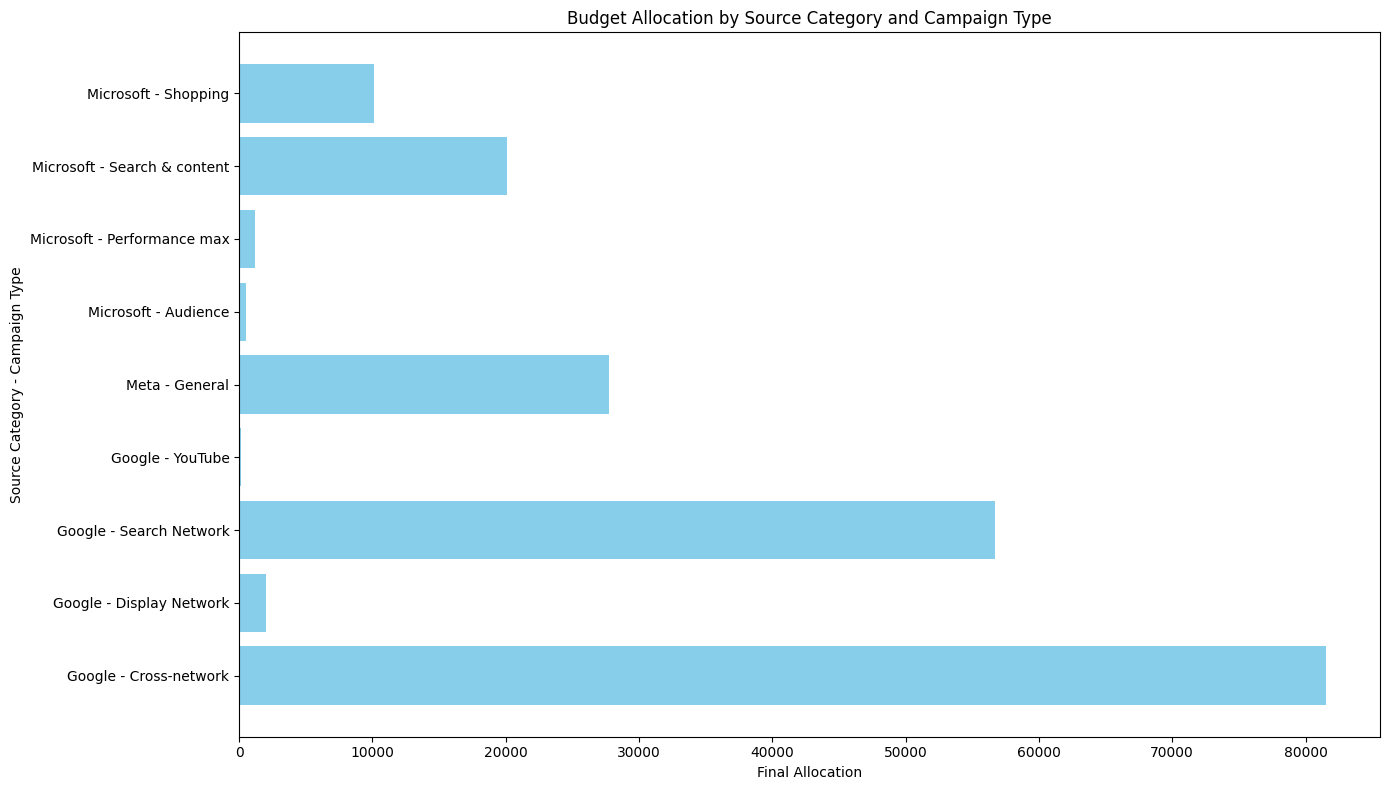

In [34]:
allocation_distribution = grouped_data.groupby(['Source_Category', 'Campaign type'])['Final_Budget'].sum()

# Reset index to get a DataFrame suitable for plotting
allocation_df = allocation_distribution.reset_index()

# Shorten labels for clarity
labels = [f"{source} - {campaign}" for source, campaign in allocation_df[['Source_Category', 'Campaign type']].values]

# Plotting the bar chart
plt.figure(figsize=(14, 8))
plt.barh(labels, allocation_df['Final_Budget'], color='skyblue')
plt.xlabel('Final Allocation')
plt.ylabel('Source Category - Campaign Type')
plt.title('Budget Allocation by Source Category and Campaign Type')
plt.tight_layout()
plt.show()

Calculating and Merging Total Conversions by Source and Channel

In [35]:
import pandas as pd

# Group by Source_Category and Channel to calculate total conversions
channel_grouped_data = website_df.groupby(['Source_Category', 'Channel']).agg({
    'Is Converted': 'sum'
}).reset_index()

# Calculate the total conversions for each Source_Category
source_conversions = channel_grouped_data.groupby('Source_Category')['Is Converted'].sum().reset_index()
source_conversions = source_conversions.rename(columns={'Is Converted': 'Total_Conversions'})

# Merge total conversions back to channel_grouped_data
channel_grouped_data = channel_grouped_data.merge(source_conversions, on='Source_Category', how='left')


Calculating Conversion Weight and Initial Budget for Channels

In [36]:
# Calculate conversion weight
channel_grouped_data['Conversion_Weight'] = channel_grouped_data['Is Converted'] / channel_grouped_data['Total_Conversions']

# Merge the source budget information
channel_grouped_data = channel_grouped_data.merge(grouped_data[['Source_Category', 'Final_Budget']], on='Source_Category', how='left')

# Calculate the initial budget based on conversion weight
channel_grouped_data['Initial_Channel_Budget'] = channel_grouped_data['Conversion_Weight'] * channel_grouped_data['Final_Budget']


In [37]:
minimum_paid_budget_percentage = 0.10

# Identify paid and paid search channels
paid_mask = channel_grouped_data['Channel'].isin(['paid', 'paid search'])

# Calculate the minimum allowed budget for these channels
channel_grouped_data['Minimum_Allowed_Budget'] = channel_grouped_data.apply(
    lambda row: row['Final_Budget'] * minimum_paid_budget_percentage if row['Channel'] in ['paid', 'paid search'] else 0,
    axis=1
)

# Apply the minimum budget constraint to paid and paid search channels
channel_grouped_data['Channel_Budget'] = channel_grouped_data[['Initial_Channel_Budget', 'Minimum_Allowed_Budget']].max(axis=1)


In [38]:
# Calculate total allocated budget
total_allocated_budget = channel_grouped_data.groupby('Source_Category')['Channel_Budget'].sum().reset_index()
total_allocated_budget = total_allocated_budget.rename(columns={'Channel_Budget': 'Total_Allocated_Budget'})

# Merge total allocated budget back into the main DataFrame
channel_grouped_data = channel_grouped_data.merge(total_allocated_budget, on='Source_Category', how='left')

# Calculate remaining budget
channel_grouped_data['Remaining_Budget'] = channel_grouped_data['Final_Budget'] - channel_grouped_data['Total_Allocated_Budget']

# Calculate the total remaining budget for scaling
total_remaining_budget = channel_grouped_data['Remaining_Budget'].sum()

# Scale down the allocations proportionally if total budget exceeds the total allowed
total_budget = 200000  # Define total budget
total_allocated = total_allocated_budget['Total_Allocated_Budget'].sum()

if total_allocated > total_budget:
    # Calculate scaling ratio
    scaling_ratio = total_budget / total_allocated

    # Scale down the budget allocation
    channel_grouped_data['Final_Channel_Budget'] = (
        channel_grouped_data['Channel_Budget'] * scaling_ratio
    ).clip(lower=0)  # Ensure no negative values

else:
    # If within budget, use the calculated channel budget
    channel_grouped_data['Final_Channel_Budget'] = channel_grouped_data['Channel_Budget'].clip(lower=0)  # Ensure no negative values

# Display final budget allocation for each Source_Category and Channel



In [39]:
# Group by Source_Category and Channel, then sum the Channel_Budget
aggregated_data = channel_grouped_data.groupby(['Source_Category', 'Channel']).agg({
    'Final_Channel_Budget': 'sum'
}).reset_index()

# Display the aggregated data
print(aggregated_data)


   Source_Category         Channel  Final_Channel_Budget
0           Google           email            261.169045
1           Google  organic search          21009.598762
2           Google            paid         107572.627916
3           Google     paid search          13117.940774
4           Google        referral             29.018783
5           Google          social           2306.993234
6             Meta            paid          25900.667260
7             Meta          social              0.000000
8        Microsoft           email             76.611785
9        Microsoft  organic search            796.762560
10       Microsoft            paid          28928.609880


In [40]:
print(aggregated_data['Final_Channel_Budget'].sum())

200000.00000000003


Bar Chart for Budget Allocation for Source and Channel:

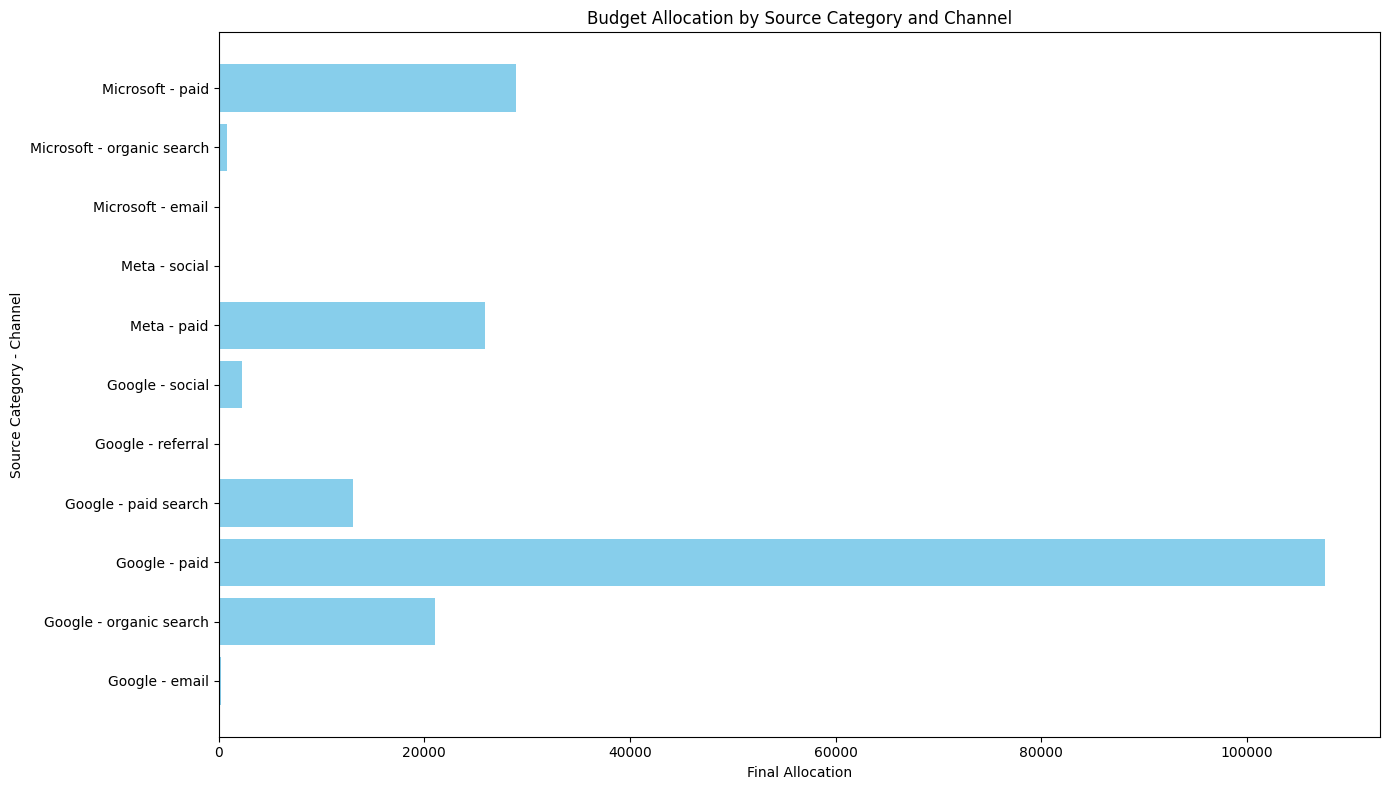

In [41]:
allocation_distribution = aggregated_data.groupby(['Source_Category', 'Channel'])['Final_Channel_Budget'].sum()

# Reset index to get a DataFrame suitable for plotting
allocation_df = allocation_distribution.reset_index()

# Shorten labels for clarity
labels = [f"{source} - {channel}" for source, channel in allocation_df[['Source_Category', 'Channel']].values]

# Plotting the bar chart
plt.figure(figsize=(14, 8))
plt.barh(labels, allocation_df['Final_Channel_Budget'], color='skyblue')
plt.xlabel('Final Allocation')
plt.ylabel('Source Category - Channel')
plt.title('Budget Allocation by Source Category and Channel')
plt.tight_layout()
plt.show()

**Top Contributing Channels:**

**Google - Paid:**
This channel is contributing the most, likely because of its high conversion weight and the 10% minimum budget rule for paid channels. Google Paid channels often drive high conversions, which explains the significant budget allocation.

**Google - Organic Search:**
Organic search tends to drive a lot of traffic without direct costs, but due to its effectiveness in conversions, it receives a substantial budget. It likely has a high conversion weight relative to other channels.

**Google - Paid Search:**
Paid search also gets a sizable budget due to its strong performance in driving conversions and the application of the 10% minimum budget rule.

**Meta - Paid: **
Meta's paid channel receives a significant amount of the budget, likely due to strong conversion performance. As a paid media channel, it also benefits from the minimum budget rule.

**Microsoft - Paid:**
Like Google and Meta, Microsoft's paid channel is getting a considerable budget, probably due to its performance in driving conversions and the 10% minimum allocation rule.

**Channels with Lower Contributions:**

**Meta - Social:**
This might indicate that Meta's social channel has a low conversion weight or it didn’t generate significant conversions, resulting in no budget allocation.

**Google - Referral:**
Referral channels typically drive fewer conversions, hence a smaller budget.

Estimating conversions

In [42]:
# Filter out rows where Clicks is zero
ads_data_nonzero_clicks = ads_data[ads_data['Clicks'] > 0]

Calculating Cost to Clicks Ratio and Cost per Impression

In [43]:
# Recalculate Cost to Clicks Ratio with non-zero Clicks
cost_to_clicks_ratio = ads_data_nonzero_clicks['Cost'] / ads_data_nonzero_clicks['Clicks']
cost_to_clicks_ratio = cost_to_clicks_ratio.mean()

print(f'Updated Cost to Clicks Ratio: {cost_to_clicks_ratio}')


Updated Cost to Clicks Ratio: 5.172256919756267


In [44]:
ads_data['Cost_Per_Impression'] = ads_data['Cost'] / ads_data['Impressions']
cost_to_impressions_ratio = ads_data['Cost_Per_Impression'].mean()


In [45]:
budget_allocation_campaigns=grouped_data[['Source_Category', 'Campaign type', 'Final_Budget']]

Preparing Input Features for Analysis

In [46]:
ads_data_merged = pd.merge(ads_data, budget_allocation_campaigns, how='left', on=['Source_Category', 'Campaign type'])

# Handle NaN in Final_Budget (in case there's no budget for a particular campaign)
ads_data_merged['Final_Budget'].fillna(ads_data_merged['Cost'], inplace=True)

# Handle `inf` and NaN in Impressions and Clicks
ads_data_merged.replace([np.inf, -np.inf], np.nan, inplace=True)
ads_data_merged.fillna({'Impressions': ads_data_merged['Impressions'].median(), 'Clicks': ads_data_merged['Clicks'].median()}, inplace=True)

# Scale Impressions, Clicks, and Revenue based on the new budget
ads_data_merged['New_Impressions'] = ads_data_merged['Impressions'] * (ads_data_merged['Final_Budget'] / ads_data_merged['Cost'])
ads_data_merged['New_Clicks'] = ads_data_merged['Clicks'] * (ads_data_merged['Final_Budget'] / ads_data_merged['Cost'])
ads_data_merged['New_Revenue'] = ads_data_merged['Revenue'] * (ads_data_merged['Final_Budget'] / ads_data_merged['Cost'])

# Create a new input DataFrame with only the necessary features
input_features = pd.DataFrame({
    'Campaign type': ads_data_merged['Campaign type'],
    'Impressions': ads_data_merged['New_Impressions'],
    'Clicks': ads_data_merged['New_Clicks'],
    'Cost': ads_data_merged['Final_Budget'],
    'Revenue': ads_data_merged['New_Revenue'],
    'Source_Category': ads_data_merged['Source_Category'],
    'Conversion_Rate': ads_data_merged['Conversion_Rate'],
    'Avg_Time_Lag': ads_data_merged['Avg_Time_Lag'],
    'Channel': ads_data_merged['Channel']
})



Data Cleaning and Scaling

In [47]:
import numpy as np

# Replace inf and -inf with NaN
ads_data_merged.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values with median
ads_data_merged.fillna({'Impressions': ads_data_merged['Impressions'].median(),
                        'Clicks': ads_data_merged['Clicks'].median(),
                        'Revenue': ads_data_merged['Revenue'].median(),
                        'Cost': ads_data_merged['Cost'].median()}, inplace=True)

# Avoid division by zero by replacing zero cost with a small number
ads_data_merged['Cost'] = ads_data_merged['Cost'].replace(0, np.nanmedian(ads_data_merged['Cost']))

# Scale values based on the Final Budget and Cost ratio
ads_data_merged['New_Impressions'] = ads_data_merged['Impressions'] * (ads_data_merged['Final_Budget'] / ads_data_merged['Cost'])
ads_data_merged['New_Clicks'] = ads_data_merged['Clicks'] * (ads_data_merged['Final_Budget'] / ads_data_merged['Cost'])
ads_data_merged['New_Revenue'] = ads_data_merged['Revenue'] * (ads_data_merged['Final_Budget'] / ads_data_merged['Cost'])

# Verify if everything calculated correctly
ads_data_merged[['Impressions', 'New_Impressions', 'Clicks', 'New_Clicks', 'Revenue', 'New_Revenue', 'Final_Budget', 'Cost']].head()


,Impressions,New_Impressions,Clicks,New_Clicks,Revenue,New_Revenue,Final_Budget,Cost
0,143669.0,1.784379e+07,896.0,111283.804046,1410.3,175160.210766,81512.902450,656.3
1,3.0,5.042017e+01,0.0,0.000000,0.0,0.000000,2000.000000,119.0
2,3701.0,4.228954e+05,251.0,28680.556616,576.4,65862.441567,56732.654819,496.5
3,36211.0,4.457749e+04,8.0,9.848386,0.0,0.000000,141.816761,115.2
4,183496.0,9.808060e+06,1172.0,62644.669949,3565.7,190590.528700,81512.902450,1525.0


Applying Budget Ratio and Scaling

In [48]:
# Ensure the ratio is within a reasonable range
ads_data_merged['Budget_Ratio'] = ads_data_merged['Final_Budget'] / ads_data_merged['Cost']

# Apply a cap or normalization if needed
max_ratio = ads_data_merged['Budget_Ratio'].quantile(0.99)  # Top 1% ratio
ads_data_merged['Budget_Ratio'] = ads_data_merged['Budget_Ratio'].clip(upper=max_ratio)

# Recalculate scaled values
ads_data_merged['New_Impressions'] = ads_data_merged['Impressions'] * ads_data_merged['Budget_Ratio']
ads_data_merged['New_Clicks'] = ads_data_merged['Clicks'] * ads_data_merged['Budget_Ratio']
ads_data_merged['New_Revenue'] = ads_data_merged['Revenue'] * ads_data_merged['Budget_Ratio']


In [49]:
# Scale using a factor that's less likely to cause extreme values
scaling_factor = 1  # Adjust this factor if needed

ads_data_merged['New_Impressions'] = ads_data_merged['Impressions'] * scaling_factor
ads_data_merged['New_Clicks'] = ads_data_merged['Clicks'] * scaling_factor
ads_data_merged['New_Revenue'] = ads_data_merged['Revenue'] * scaling_factor


In [50]:
input_features = pd.DataFrame({
    'Campaign type': ads_data_merged['Campaign type'],
    'Impressions': ads_data_merged['New_Impressions'],
    'Clicks': ads_data_merged['New_Clicks'],
    'Cost': ads_data_merged['Final_Budget'],
    'Revenue': ads_data_merged['New_Revenue'],
    'Source_Category': ads_data_merged['Source_Category'],
    'Conversion_Rate': ads_data_merged['Conversion_Rate'],
    'Avg_Time_Lag': ads_data_merged['Avg_Time_Lag'],
    'Channel': ads_data_merged['Channel']
})

# Display the separate DataFrame with input features
print("Input Features DataFrame:")
print(input_features)

Input Features DataFrame:
        Campaign type  Impressions  Clicks          Cost  Revenue  \
0       Cross-network     143669.0   896.0  81512.902450   1410.3   
1     Display Network          3.0     0.0   2000.000000      0.0   
2      Search Network       3701.0   251.0  56732.654819    576.4   
3             YouTube      36211.0     8.0    141.816761      0.0   
4       Cross-network     183496.0  1172.0  81512.902450   3565.7   
...               ...          ...     ...           ...      ...   
1612          General      13392.0   148.0  27718.730591   3196.5   
1613          General      13092.0   161.0  27718.730591   4032.7   
1614          General      13678.0   165.0  27718.730591   6409.1   
1615          General      17855.0   273.0  27718.730591    649.7   
1616          General      19402.0   261.0  27718.730591   1536.7   

     Source_Category  Conversion_Rate   Avg_Time_Lag Channel  
0             Google         0.015371      40.793737    paid  
1             Googl

In [51]:
input_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1617 entries, 0 to 1616
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Campaign type    1617 non-null   object 
 1   Impressions      1617 non-null   float64
 2   Clicks           1617 non-null   float64
 3   Cost             1617 non-null   float64
 4   Revenue          1617 non-null   float64
 5   Source_Category  1617 non-null   object 
 6   Conversion_Rate  1617 non-null   float64
 7   Avg_Time_Lag     1617 non-null   float64
 8   Channel          1617 non-null   object 
dtypes: float64(6), object(3)
memory usage: 113.8+ KB


Label Encoding

In [52]:
input_features['Source_Category'] = label_encoder_source.transform(input_features['Source_Category'])
input_features['Campaign type'] = label_encoder_campaign.transform(input_features['Campaign type'])
input_features['Channel'] = label_encoder_channel.transform(input_features['Channel'])


Checking for Infinity Values

In [53]:
# Check for infinity values in the DataFrame
inf_values = input_features[numerical_features].isin([float('inf'), float('-inf')])

# Count the number of rows that contain inf values
rows_with_inf = inf_values.any(axis=1).sum()

# Total number of rows in the DataFrame
total_rows = len(input_features)

# Calculate the percentage of rows with inf values
percentage_with_inf = (rows_with_inf / total_rows) * 100

# Display the percentage
print(f"Percentage of rows with inf values: {percentage_with_inf:.2f}%")


Percentage of rows with inf values: 0.00%


In [54]:
input_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1617 entries, 0 to 1616
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Campaign type    1617 non-null   int64  
 1   Impressions      1617 non-null   float64
 2   Clicks           1617 non-null   float64
 3   Cost             1617 non-null   float64
 4   Revenue          1617 non-null   float64
 5   Source_Category  1617 non-null   int64  
 6   Conversion_Rate  1617 non-null   float64
 7   Avg_Time_Lag     1617 non-null   float64
 8   Channel          1617 non-null   int64  
dtypes: float64(6), int64(3)
memory usage: 113.8 KB


Checking for null values

In [55]:
# Check if there are any remaining NaN or infinite values
print(input_features[numerical_features].isna().sum())  # Should print all zeros
print(np.isinf(input_features[numerical_features]).sum())  # Should also print all zeros


Impressions        0
Clicks             0
Cost               0
Revenue            0
Conversion_Rate    0
Avg_Time_Lag       0
dtype: int64
Impressions        0
Clicks             0
Cost               0
Revenue            0
Conversion_Rate    0
Avg_Time_Lag       0
dtype: int64


Predicting Conversions using the model

In [56]:
predicted_conversions_scaled = model.predict(input_features)

Inverse transforming the features

In [57]:
input_features['Campaign type'] = label_encoder_campaign.inverse_transform(input_features['Campaign type'])
input_features['Source_Category'] = label_encoder_source.inverse_transform(input_features['Source_Category'])
input_features['Channel']= label_encoder_channel.inverse_transform(input_features['Channel'])

Estimating Conversions

In [58]:
predicted_conversions = y_scaler.inverse_transform(predicted_conversions_scaled.reshape(-1, 1))
input_features['Predicted_Conversions'] = predicted_conversions
# Group by 'Source_Category' and 'Campaign type' and calculate the sum of predicted conversions
grouped_predictions = input_features.groupby(['Source_Category', 'Campaign type'])['Predicted_Conversions'].sum().reset_index()

# Display the grouped results
print(grouped_predictions)

  Source_Category     Campaign type  Predicted_Conversions
0          Google     Cross-network              14979.146
1          Google   Display Network               3014.823
2          Google    Search Network              14979.146
3          Google           YouTube               4465.862
4            Meta           General              14302.030
5       Microsoft          Audience               6007.446
6       Microsoft   Performance max               6816.566
7       Microsoft  Search & content              14917.047
8       Microsoft          Shopping              14657.392
